In [40]:
import tensorflow as tf
import matplotlib.pyplot as plt
import splitfolders
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras_preprocessing.image import ImageDataGenerator

In [41]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [42]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [55]:
image_size = (128,128)
color_mode = 'grayscale'
batch_size = 16

In [56]:
# type 1 batch generators

dataset_dir = 'dataset_images_03s_128x128'
original_labels = ("Electronic", "Experimental", "Folk", "Hip-Hop", "Instrumental", "International", "Pop", "Rock")

data = tf.keras.utils.image_dataset_from_directory(dataset_dir, batch_size=batch_size, image_size=image_size, color_mode = color_mode)
data_generator = data.as_numpy_iterator()

Found 79940 files belonging to 8 classes.


In [57]:
# type 1 pre-processing: normalization and splitting

data_processed = data.map(lambda x,y: (x/255, tf.one_hot(y,depth=8)))
data_processed.as_numpy_iterator().next()

train_dataset_size = int(len(data_processed) * 0.8)
validation_dataset_size = int(len(data_processed) * 0.15)
test_dataset_size = int(len(data_processed) * 0.05)

train_dataset = data_processed.take(train_dataset_size)
validation_dataset = data_processed.skip(train_dataset_size).take(validation_dataset_size)
test_dataset = data_processed.skip(train_dataset_size + validation_dataset_size).take(test_dataset_size)

In [58]:
# model definition 
def initiate_model():
    model = Sequential()

    model.add(Conv2D(32, input_shape=(128,128,1), kernel_size=(7,7), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(64, kernel_size=(7,7), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size=(7,7), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(256, kernel_size=(7,7), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(512, kernel_size=(5,5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
              
    model.add(Dense(1024,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(8,activation='softmax'))

    return model

In [59]:
# callbacks

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1)
model_checkpoint = ModelCheckpoint('checkpoints/mdl_wts.h5', save_best_only=True, monitor='val_accuracy', mode='max')

In [9]:
model_1 = initiate_model()
model_1.compile(loss=tf.keras.losses.categorical_crossentropy, metrics='accuracy',optimizer=Adam(learning_rate=0.001))
history_1 = model_1.fit(train_dataset, validation_data=validation_dataset, epochs = 200, callbacks = [reduce_lr, early_stopping, model_checkpoint])

Epoch 1/200
1749/1749 [==============================] - 125s 69ms/step - loss: 1.9156 - accuracy: 0.3255 - val_loss: 2.6738 - val_accuracy: 0.2213 - lr: 0.0010
Epoch 2/200
1749/1749 [==============================] - 122s 70ms/step - loss: 1.5657 - accuracy: 0.4452 - val_loss: 2.1082 - val_accuracy: 0.2940 - lr: 0.0010
Epoch 3/200
1749/1749 [==============================] - 120s 69ms/step - loss: 1.4629 - accuracy: 0.4857 - val_loss: 2.5644 - val_accuracy: 0.2460 - lr: 0.0010
Epoch 4/200
1749/1749 [==============================] - 122s 70ms/step - loss: 1.4043 - accuracy: 0.5075 - val_loss: 1.6006 - val_accuracy: 0.4645 - lr: 0.0010
Epoch 5/200
1749/1749 [==============================] - 121s 69ms/step - loss: 1.3502 - accuracy: 0.5288 - val_loss: 2.1467 - val_accuracy: 0.3178 - lr: 0.0010
Epoch 6/200
1749/1749 [==============================] - 123s 70ms/step - loss: 1.2791 - accuracy: 0.5566 - val_loss: 1.7618 - val_accuracy: 0.4041 - lr: 0.0010
Epoch 7/200
1749/1749 [===========

In [11]:
model_1.save('models/CNN_76%_B32_5L+D_NO-AUG.h5')

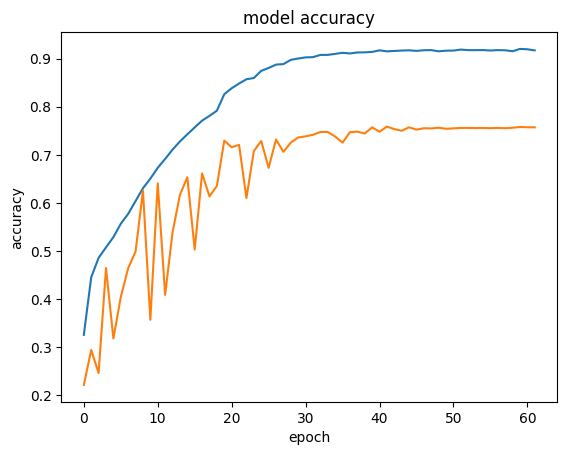

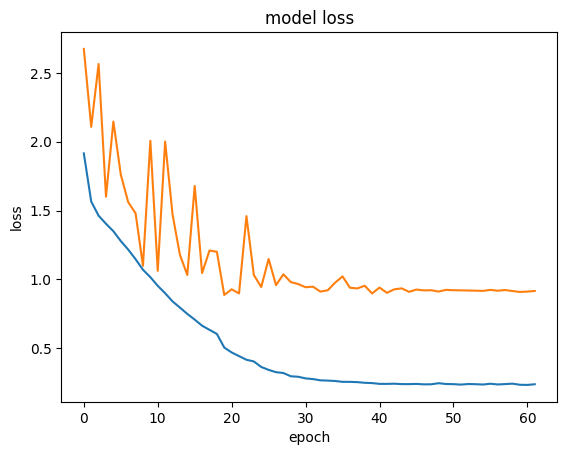

In [12]:
plt.figure(1)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
model_2 = initiate_model()
model_2.compile(loss=tf.keras.losses.categorical_crossentropy, metrics='accuracy',optimizer=Adam(learning_rate=0.001))
history_2 = model_2.fit(train_dataset, validation_data=validation_dataset, epochs = 100, callbacks = [reduce_lr, early_stopping, model_checkpoint])

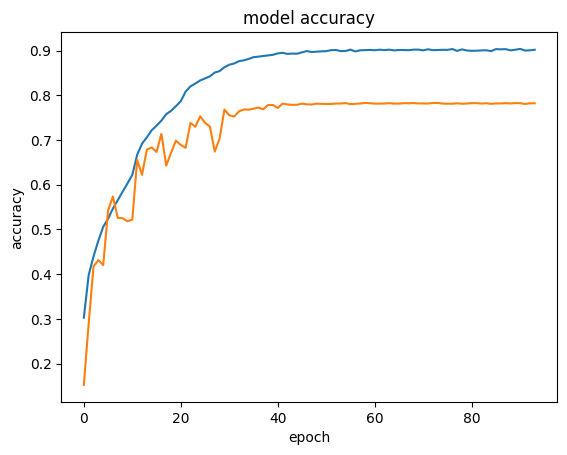

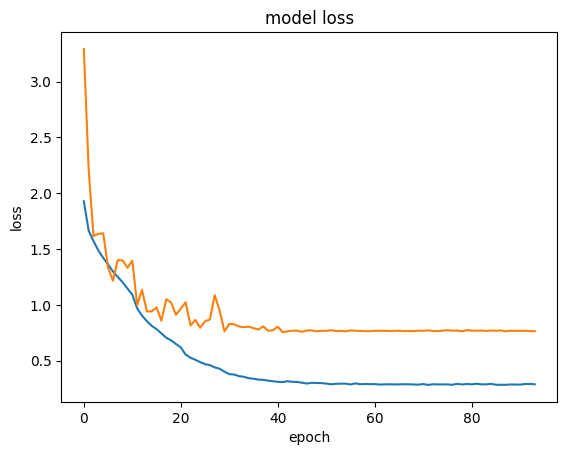

In [21]:
plt.figure(1)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [22]:
model_2.save('models/CNN_79%_B16_5L+D_NO-AUG.h5')

In [ ]:
model_2.evaluate(test_dataset, verbose=1)

In [17]:
model = load_model('models/CNN_79%_B16_5L+D_NO-AUG.h5')

In [26]:
model.evaluate(train_dataset)

1999/1999 [==============================] - 42s 21ms/step - loss: 0.2648 - accuracy: 0.9274


[0.2647888660430908, 0.9273699522018433]

In [27]:
model.evaluate(test_dataset)

124/124 [==============================] - 42s 24ms/step - loss: 0.2626 - accuracy: 0.9277


[0.2626449465751648, 0.9276713728904724]

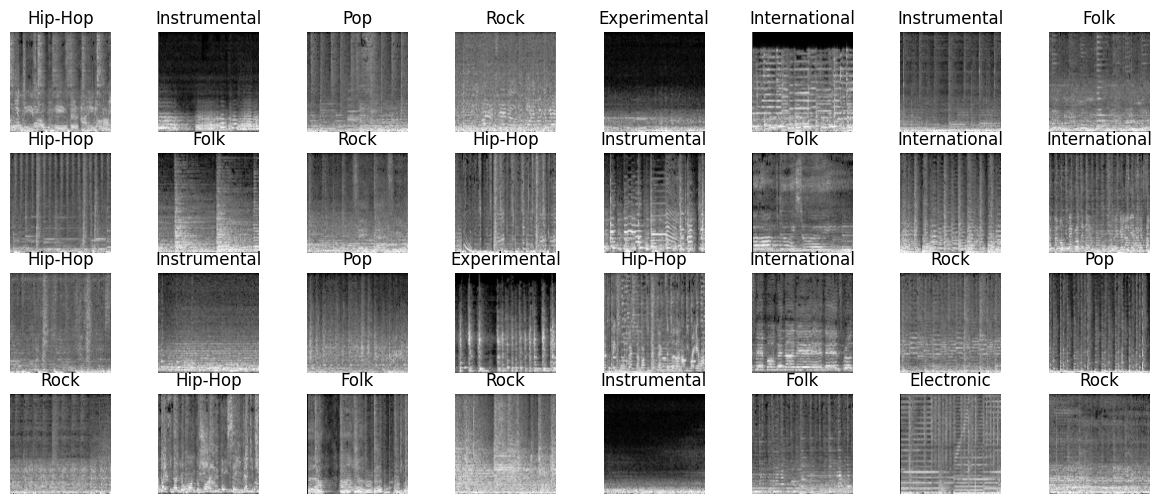

In [44]:
def plot_images(images, labels):
    num_images = len(images)
    plt.figure(figsize=(15, 6))
    for i in range(num_images):
        plt.subplot(4, 8, i + 1)
        plt.imshow(images[i], cmap='gray') 
        plt.title(f"{original_labels[np.argmax(labels[i])]}")  
        plt.axis('off')
    plt.show()

# Extract the first batch from the test_dataset
first_batch = next(iter(test_dataset))

# Unpack the batch into images and labels
images, labels = first_batch

# Plot the images from the first batch with labels
plot_images(images.numpy(), labels.numpy())

In [45]:
model.evaluate(train_dataset)
model.evaluate(validation_dataset)
model.evaluate(test_dataset)

124/124 [==============================] - 41s 25ms/step - loss: 0.2616 - accuracy: 0.9282


[0.2615658640861511, 0.9281753897666931]

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      1600      
                                                                 
 batch_normalization_7 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 64)        100416    
                                                                 
 batch_normalization_8 (Batc  (None, 64, 64, 64)      

In [50]:
test_datagen = ImageDataGenerator(rescale = 1/255.0)
test_gen = test_datagen.flow_from_directory("dataset_images_03s_128x128", target_size=(128,128), color_mode='grayscale', batch_size=32, class_mode='categorical', shuffle = True, seed=42)

Found 79940 images belonging to 8 classes.


In [51]:
model.evaluate(test_gen)

2499/2499 [==============================] - 85s 34ms/step - loss: 0.2656 - accuracy: 0.9275


[0.2656286954879761, 0.9275456666946411]

In [60]:
model_rev = initiate_model()
model_rev.compile(loss=tf.keras.losses.categorical_crossentropy, metrics='accuracy',optimizer=Adam(learning_rate=0.001))
history_rev = model_rev.fit(train_dataset, validation_data=validation_dataset, epochs = 100, callbacks = [reduce_lr, early_stopping, model_checkpoint])

Epoch 1/100
3997/3997 [==============================] - 201s 50ms/step - loss: 1.9066 - accuracy: 0.3154 - val_loss: 1.7994 - val_accuracy: 0.3480 - lr: 0.0010
Epoch 2/100
3997/3997 [==============================] - 180s 45ms/step - loss: 1.6188 - accuracy: 0.4208 - val_loss: 2.3239 - val_accuracy: 0.2485 - lr: 0.0010
Epoch 3/100
3997/3997 [==============================] - 178s 44ms/step - loss: 1.5097 - accuracy: 0.4656 - val_loss: 1.7932 - val_accuracy: 0.3490 - lr: 0.0010
Epoch 4/100
3997/3997 [==============================] - 169s 42ms/step - loss: 1.4380 - accuracy: 0.4965 - val_loss: 1.4654 - val_accuracy: 0.4913 - lr: 0.0010
Epoch 5/100
3997/3997 [==============================] - 169s 42ms/step - loss: 1.3783 - accuracy: 0.5172 - val_loss: 1.5003 - val_accuracy: 0.4809 - lr: 0.0010
Epoch 6/100
3997/3997 [==============================] - 167s 42ms/step - loss: 1.3238 - accuracy: 0.5401 - val_loss: 2.8783 - val_accuracy: 0.2429 - lr: 0.0010
Epoch 7/100
3997/3997 [===========

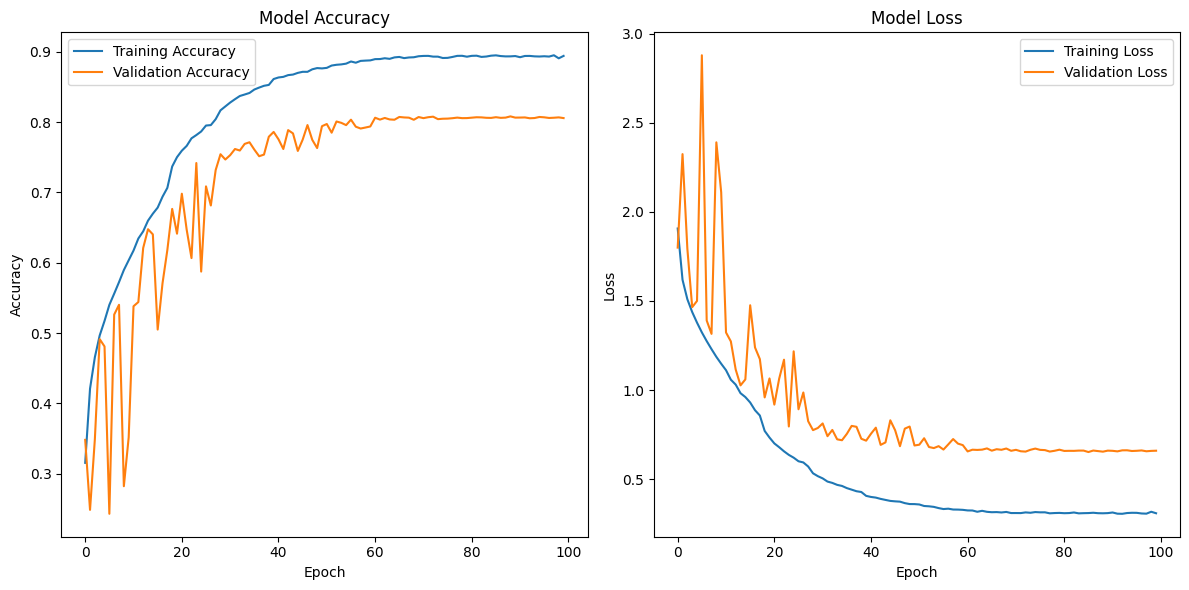

In [61]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_rev.history['accuracy'], label='Training Accuracy')
plt.plot(history_rev.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_rev.history['loss'], label='Training Loss')
plt.plot(history_rev.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [62]:
model_rev.evaluate(test_dataset)

249/249 [==============================] - 12s 10ms/step - loss: 0.6629 - accuracy: 0.8027


[0.6629257798194885, 0.8027108311653137]

In [63]:
model_rev_best = load_model('checkpoints/mdl_wts.h5')

In [64]:
model_rev_best.evaluate(test_dataset)

249/249 [==============================] - 14s 9ms/step - loss: 0.6588 - accuracy: 0.8040


[0.6587611436843872, 0.8039658665657043]

In [ ]:
model_rev_best.compile(loss=tf.keras.losses.categorical_crossentropy, metrics='accuracy',optimizer=Adam(learning_rate=0.0001))
history_rev = model_rev.fit(train_dataset, validation_data=validation_dataset, epochs = 50, callbacks = [model_checkpoint])

Epoch 1/50
3997/3997 [==============================] - 129s 32ms/step - loss: 0.3091 - accuracy: 0.8935 - val_loss: 0.6618 - val_accuracy: 0.8059
Epoch 2/50
1720/3997 [===========>..................] - ETA: 1:05 - loss: 0.3098 - accuracy: 0.8918